In [2]:
# Import libraries
'''Main'''
import numpy as np
import pandas as pd
import os, time
import pickle, gzip

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [3]:
# Load datasets
current_path = os.getcwd()
file = '\\datasets\\credit_card_data\\creditcard.csv'
data = pd.read_csv(current_path + file)

dataX = data.copy().drop(['Class'],axis=1)
dataY = data['Class'].copy()

featuresToScale = dataX.columns
sX = pp.StandardScaler(copy=True)
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])

X_train, X_test, y_train, y_test = \
    train_test_split(dataX, dataY, test_size=0.33, \
                    random_state=2018, stratify=dataY)

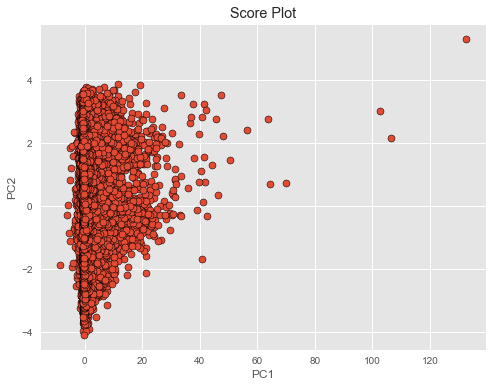

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
 
# Define the PCA object
pca = PCA()
 
# Run PCA on scaled data and obtain the scores array
T = pca.fit_transform(StandardScaler().fit_transform(dataX[featuresToScale]))
 
# Score plot of the first 2 PC
fig = plt.figure(figsize=(8,6))
with plt.style.context(('ggplot')):
    plt.scatter(T[:, 0], T[:, 1], edgecolors='k', cmap='jet')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Score Plot')
plt.show()

In [23]:
print(T.shape)

(284807, 30)


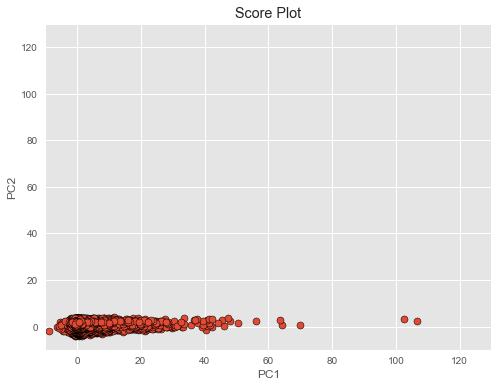

In [5]:
fig = plt.figure(figsize=(8,6))
with plt.style.context(('ggplot')):
    plt.scatter(T[:, 0], T[:, 1], edgecolors='k', cmap='jet')
    plt.xlim((-10, 130))
    plt.ylim((-10, 130))
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Score Plot')
plt.show()

In [6]:
# Compute the euclidean distance using the first 5 PC
euclidean = np.zeros(dataX.shape[0])
for i in range(5):
    euclidean += (T[:,i] - np.mean(T[:,:5]))**2/np.var(T[:,:5])

In [7]:
maxeu = max(euclidean)

colors = plt.cm.jet(euclidean/maxeu) 

In [8]:
min(euclidean)

0.03138052722453359

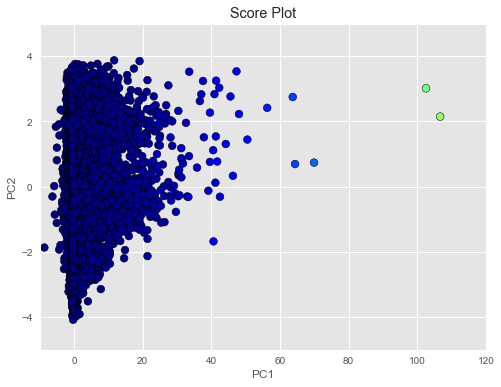

In [9]:
#colors = [plt.cm.jet(float(i)/max(euclidean)) for i in euclidean]
fig = plt.figure(figsize=(8,6))
with plt.style.context(('ggplot')):
    plt.scatter(T[:, 0], T[:, 1], c=colors, edgecolors='k', s=60)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.xlim((-10, 120))
    plt.ylim((-5, 5))
    plt.title('Score Plot')
plt.show()

In [22]:
#Find the top 350 percentage of records and mark as outliers
cutoff = 500

extremeIndex = np.argsort(euclidean)[::-1][:cutoff]

dataY[extremeIndex].value_counts()

0    401
1     99
Name: Class, dtype: int64

In [10]:
from sklearn.covariance import EmpiricalCovariance, MinCovDet
# fit a Minimum Covariance Determinant (MCD) robust estimator to data 
robust_cov = MinCovDet().fit(T[:,:5])
# Get the Mahalanobis distance
m = robust_cov.mahalanobis(T[:,:5])

In [11]:
maxm = max(m)

colors_m = plt.cm.jet(m/maxm) 

In [21]:
#Find the top 350 percentage of records and mark as outliers
cutoff = 500

extremeIndex = np.argsort(m)[::-1][:cutoff]

dataY[extremeIndex].value_counts()

#dataY.value_counts()
#dataY[extremeIndex].value_counts()

0    500
Name: Class, dtype: int64

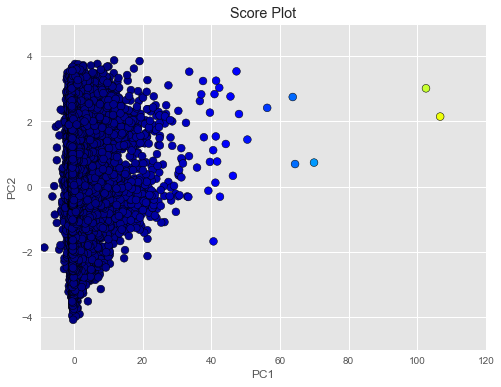

In [21]:
#colors = [plt.cm.jet(float(i)/max(euclidean)) for i in euclidean]
fig = plt.figure(figsize=(8,6))
with plt.style.context(('ggplot')):
    plt.scatter(T[:, 0], T[:, 1], c=colors_m, edgecolors='k', s=60)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.xlim((-10, 120))
    plt.ylim((-5, 5))
    plt.title('Score Plot')
plt.show()